In [1]:
import xarray as xr
import matplotlib.pyplot as plt

# ocean output

In [9]:
ds = xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0002_1850spinup/ocn/hist/'+
                     'COUP0002_1850spinup.pop.h.0001-01-04.nc')

In [10]:
# MONTHLY COUP0000_1850spinup.pop.h.0001-*.nc = 266.4 GB
# DAILY 

In [11]:
ds

<xarray.Dataset>
Dimensions:                          (time: 1, d2: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60, nlat: 384, nlon: 320)
Coordinates:
  * time                             (time) object 0001-01-05 00:00:00
  * z_t                              (z_t) float32 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                         (z_t_150m) float32 500.0 ... 1.45e+04
  * z_w                              (z_w) float32 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_top                          (z_w_top) float32 0.0 1e+03 ... 5.25e+05
  * z_w_bot                          (z_w_bot) float32 1e+03 2e+03 ... 5.5e+05
    ULONG                            (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                            (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/397)
    time_bound                       (time, d2) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    dz                               (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    dzw                              (z_w) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    KMT                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMU                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    REGION_MASK                      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ...                               ...
    ADVT_SUBM                        (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ADVS_SUBM                        (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    VNT_SUBM                         (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
    VNS_SUBM                         (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
    SUBM_ADV_TEND_TEMP               (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
    SUBM_ADV_TEND_SALT               (time, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>
Attributes:
    title:             COUP0002_1850spinup
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  day_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2022-02-27 at 18:16:38.1
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

# compare 4-day runs

In [27]:
basecase = xr.open_mfdataset('/glade/scratch/czarakas/archive/'+
                           'COUP0000_1850spinup_SOM_v02'+
                           '/atm/hist/'+
                           'COUP0000_1850spinup_SOM_v02.cam.h1.0041*.nc')

keys=['COUP0007','COUP0008']
#'COUP0001','COUP0002','COUP0007','COUP0008','COUP0009',
#      'COUP0010','COUP0013','COUP0014','COUP0015','COUP0016','COUP0017','COUP0018','COUP0019',
#      'COUP0020','COUP0021','COUP0022','COUP0023','COUP0024','COUP0025',
#      'COUP0026','COUP0027','COUP0028','COUP0029','COUP0030',
#      'COUP0031','COUP0032','COUP0033','COUP0034','COUP0035',
#      'COUP0036']
ensemble_tests = []
for key in keys:
    ds = xr.open_mfdataset('/glade/scratch/czarakas/archive/'+
                           key+'_1850_SOM'+
                           '/atm/hist/'+
                           key+'_1850_SOM.cam.h1.0041*.nc')
    ensemble_tests.append(ds)

Text(0.5, 1.0, 'Amazon')

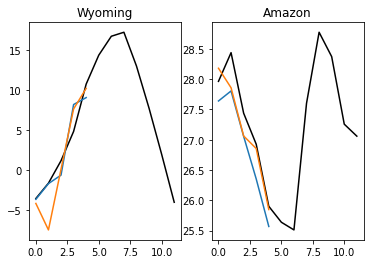

In [28]:
plt.subplot(1,2,1)
plt.plot(basecase.TREFHT[0:12,ilat,ilon]-273.15,'-k')
for i,key in enumerate(keys):
    plt.plot(ensemble_tests[i].TREFHT[0:5,ilat,ilon]-273.15)
plt.title('Wyoming')
plt.subplot(1,2,2)
plt.plot(basecase.TREFHT[0:12,45,120]-273.15,'-k')
for i,key in enumerate(keys):
    plt.plot(ensemble_tests[i].TREFHT[0:5,45,120]-273.15)
plt.title('Amazon')

In [29]:
basecase = xr.open_mfdataset('/glade/scratch/czarakas/archive/'+
                           'COUP0000_1850spinup_SOM_v02'+
                           '/atm/hist/'+
                           'COUP0000_1850spinup_SOM_v02.cam.h2.0041*.nc')

keys=['COUP0007','COUP0008']
#'COUP0001','COUP0002','COUP0007','COUP0008','COUP0009',
#      'COUP0010','COUP0013','COUP0014','COUP0015','COUP0016','COUP0017','COUP0018','COUP0019',
#      'COUP0020','COUP0021','COUP0022','COUP0023','COUP0024','COUP0025',
#      'COUP0026','COUP0027','COUP0028','COUP0029','COUP0030',
#      'COUP0031','COUP0032','COUP0033','COUP0034','COUP0035',
#      'COUP0036']
ensemble_tests = []
for key in keys:
    ds = xr.open_mfdataset('/glade/scratch/czarakas/archive/'+
                           key+'_1850_SOM'+
                           '/atm/hist/'+
                           key+'_1850_SOM.cam.h2.0041*.nc')
    ensemble_tests.append(ds)

In [30]:
itime=4
ilat=70
ilon=100

Text(0.5, 1.0, 'Amazon')

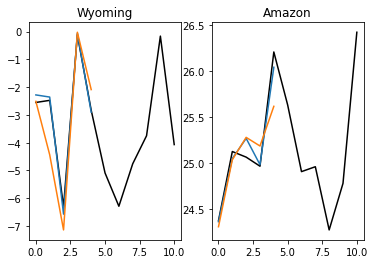

In [33]:
plt.subplot(1,2,1)
plt.plot(basecase.TSMN[1:12,ilat,ilon]-273.15,'-k')
for i,key in enumerate(keys):
    plt.plot(ensemble_tests[i].TSMN[0:5,ilat,ilon]-273.15)
plt.title('Wyoming')
plt.subplot(1,2,2)
plt.plot(basecase.TSMN[1:12,45,120]-273.15,'-k')
for i,key in enumerate(keys):
    plt.plot(ensemble_tests[i].TSMN[0:5,45,120]-273.15)
plt.title('Amazon')

In [87]:

print(basecase.TSMX.values[itime,ilat,ilon])
for i,key in enumerate(keys):
    thisensemble=ensemble_tests[i].TSMX.values[itime,ilat,ilon]
    for j,key in enumerate(keys):
        compensemble=ensemble_tests[j].TSMX.values[itime,ilat,ilon]
        diff = thisensemble-compensemble
        if i==j:
            print(str(i)+'='+str(j)+' '+str(diff))
        else:
            if diff==0:
                print('*******************')
                print(diff)
                print('*******************')
           # else:
            #    print(diff)

266.48108
0=0 0.0
1=1 0.0
2=2 0.0
3=3 0.0
4=4 0.0
5=5 0.0
6=6 0.0
7=7 0.0
8=8 0.0
9=9 0.0
10=10 0.0
11=11 0.0
12=12 0.0
13=13 0.0
14=14 0.0
15=15 0.0
16=16 0.0
17=17 0.0
18=18 0.0
19=19 0.0
20=20 0.0
21=21 0.0
22=22 0.0
23=23 0.0
24=24 0.0
25=25 0.0
26=26 0.0
27=27 0.0
28=28 0.0
29=29 0.0


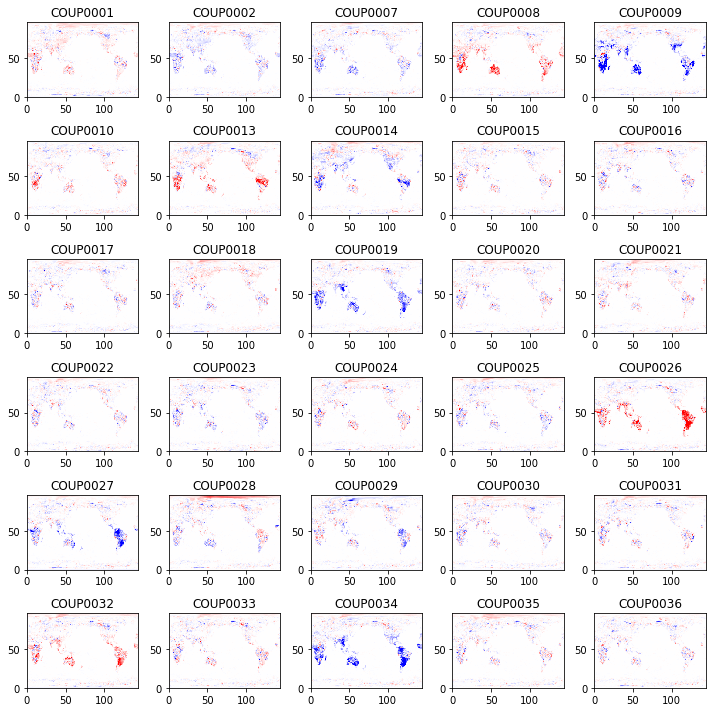

In [88]:
plt.figure(figsize=(10,10))
for i,key in enumerate(keys):
    plt.subplot(6,5,i+1)
    diff = ensemble_tests[i].TSMX[0:5,:,:]-basecase.TSMX[0:5,:,:]
    plt.pcolormesh(diff.mean(dim='time'),cmap=plt.cm.bwr, vmin=-2,vmax=2)
    plt.title(key)
#plt.colorbar()
plt.tight_layout()

In [29]:
for var in ds.variables:
    print(var)
    if var not in ['salinity_factor']:
        print(ds[var].long_name)
        print('-----------------')

time_bound
boundaries for time-averaging interval
-----------------
moc_components
MOC component names
-----------------
transport_components
T,S transport components
-----------------
transport_regions
regions for all transport diagnostics
-----------------
time
time
-----------------
z_t
depth from surface to midpoint of layer
-----------------
z_t_150m
depth from surface to midpoint of layer
-----------------
z_w
depth from surface to top of layer
-----------------
z_w_top
depth from surface to top of layer
-----------------
z_w_bot
depth from surface to bottom of layer
-----------------
lat_aux_grid
latitude grid for transport diagnostics
-----------------
moc_z
depth from surface to top of layer
-----------------
dz
thickness of layer k
-----------------
dzw
midpoint of k to midpoint of k+1
-----------------
ULONG
array of u-grid longitudes
-----------------
ULAT
array of u-grid latitudes
-----------------
TLONG
array of t-grid longitudes
-----------------
TLAT
array of t-grid lat

In [ ]:
303. G ocn
 20. G atm
 63. G cpl
 16. G lnd
11G rest
  4.1G ice
  1.4G rof

In [19]:
3.7*6*12

266.40000000000003

In [53]:
ds

<xarray.Dataset>
Dimensions:                          (time: 1, d2: 2, moc_comp: 3, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60, lat_aux_grid: 395, moc_z: 61, nlat: 384, nlon: 320)
Coordinates: (12/14)
    transport_components             (transport_comp) |S384 dask.array<chunksize=(5,), meta=np.ndarray>
    transport_regions                (transport_reg) |S384 dask.array<chunksize=(2,), meta=np.ndarray>
  * time                             (time) object 0001-03-01 00:00:00
  * z_t                              (z_t) float32 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                         (z_t_150m) float32 500.0 ... 1.45e+04
  * z_w                              (z_w) float32 0.0 1e+03 ... 5e+05 5.25e+05
    ...                               ...
  * lat_aux_grid                     (lat_aux_grid) float32 -79.49 ... 90.0
  * moc_z                            (moc_z) float32 0.0 1e+03 ... 5.5e+05
    ULONG                            (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                            (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, moc_comp, transport_comp, transport_reg, nlat, nlon
Data variables: (12/506)
    time_bound                       (time, d2) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    moc_components                   (moc_comp) |S384 dask.array<chunksize=(3,), meta=np.ndarray>
    dz                               (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    dzw                              (z_w) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    KMT                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMU                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ...                               ...
    XBLT                             (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    TBLT                             (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    BSF                              (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    MOC                              (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 dask.array<chunksize=(1, 2, 3, 61, 395), meta=np.ndarray>
    N_HEAT                           (time, transport_reg, transport_comp, lat_aux_grid) float32 dask.array<chunksize=(1, 2, 5, 395), meta=np.ndarray>
    N_SALT                           (time, transport_reg, transport_comp, lat_aux_grid) float32 dask.array<chunksize=(1, 2, 5, 395), meta=np.ndarray>
Attributes:
    title:             COUP0000_1850spinup
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2022-02-25 at 00:38:02.5
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

In [66]:
ds.zooC

<xarray.DataArray 'zooC' (time: 1, z_t_150m: 15, nlat: 384, nlon: 320)>
dask.array<open_dataset-7cf9c2139eacaa0f63190236e3705969zooC, shape=(1, 15, 384, 320), dtype=float32, chunksize=(1, 15, 384, 320), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0001-03-01 00:00:00
  * z_t_150m  (z_t_150m) float32 500.0 1.5e+03 2.5e+03 ... 1.35e+04 1.45e+04
    ULONG     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Zooplankton Carbon
    units:         mmol/m^3
    grid_loc:      3114
    cell_methods:  time: mean

In [37]:
v1_flnt=xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup/atm/proc/tseries/'+
                     '*FLNT*.nc')
v1_flnt['time']=v1_flnt.time.values-datetime.timedelta(days=15)

v1_fsnt=xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup/atm/proc/tseries/'+
                     '*FSNT*.nc')
v1_fsnt['time']=v1_fsnt.time.values-datetime.timedelta(days=15)

In [38]:
v1_restom = v1_fsnt.FSNT-v1_flnt.FLNT

In [43]:
v1_global=(v1_restom*weight_factor).mean(dim=['lat','lon']).load()#.groupby('time.year').mean(dim='time')

In [44]:
v1_annual=v1_global.groupby('time.year').mean(dim='time')

In [63]:
v1_SST=xr.open_dataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup/ocn/proc/tseries/'+
                     'COUP0000_1850spinup.pop.h.nday1.timeseries.SST.nc')
#v1['time']=v1.time.values-datetime.timedelta(days=15)

In [67]:
v1_SST.SST

<xarray.DataArray 'SST' (time: 16425, nlat: 384, nlon: 320)>
[2018304000 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-01-02 00:00:00 ... 0046-01-01 00:00:00
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Surface Potential Temperature
    units:         degC
    grid_loc:      2110
    cell_methods:  time: mean

In [69]:
temp=xr.open_dataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup/ocn/hist/'+
                     'COUP0000_1850spinup.pop.h.nday1.0045-06-01.nc')

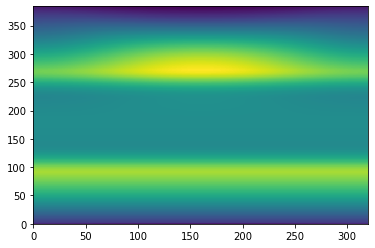

In [79]:
plt.pcolormesh()

In [74]:
temp#.TAREA

<xarray.Dataset>
Dimensions:                 (time: 30, d2: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60, nlat: 384, nlon: 320)
Coordinates:
  * time                    (time) object 0045-06-02 00:00:00 ... 0045-07-01 ...
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 ...
    ULAT                    (nlat, nlon) float64 ...
    TLONG                   (nlat, nlon) float64 ...
    TLAT                    (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/56)
    time_bound              (time, d2) object 0045-06-01 00:00:00 ... 0045-07...
    dz                      (z_t) float32 1e+03 1e+03 1e+03 ... 2.5e+04 2.5e+04
    dzw                     (z_w) float32 500.0 1e+03 ... 2.499e+04 2.5e+04
    KMT                     (nlat, nlon) float64 ...
    KMU                     (nlat, nlon) float64 ...
    REGION_MASK             (nlat, nlon) float64 ...
    ...                      ...
    nsurface_u              float64 8.297e+04
    SST                     (time, nlat, nlon) float32 ...
    SST2                    (time, nlat, nlon) float32 ...
    SSS                     (time, nlat, nlon) float32 ...
    HMXL_DR_2               (time, nlat, nlon) float32 ...
    XMXL_2                  (time, nlat, nlon) float32 ...
Attributes:
    title:             COUP0000_1850spinup
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  day_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2022-02-28 at 22:34:51.1
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

In [66]:
v1_SST_global=(v1_SST.SST*weight_factor).mean(dim=['lat','lon']).load()#.groupby('time.year').mean(dim='time')

ValueError: 'lon' not found in array dimensions ('time', 'nlat', 'nlon', 'lat')

In [ ]:
v1_SST_annual=v1_SST_global.groupby('time.year').mean(dim='time')

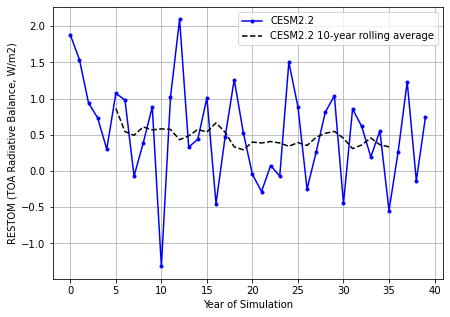

In [53]:
plt.figure(figsize=(7,5))
plt.plot(v1_annual,'.-b',label='CESM2.2')
plt.plot(v1_annual.rolling(year=10, center=True).mean(),'--k',label='CESM2.2 10-year rolling average')
plt.ylabel('RESTOM (TOA Radiative Balance, W/m2)')
plt.xlabel('Year of Simulation')
plt.legend()
plt.grid()

# Compare to base case

In [4]:
import datetime

In [5]:
v1=xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup/atm/proc/tseries/'+
                     '*TS*.nc')
v1['time']=v1.time.values-datetime.timedelta(days=15)

In [6]:
v2=xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup_v02/atm/hist/'+
                     'COUP0000_1850spinup_v02.cam.h1.*.nc')
v2['time']=v2.time.values-datetime.timedelta(days=15)

In [ ]:
v1['RESTOM']=v1.FSNT-v1.FLNT

In [14]:
v5=xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup_v05/atm/hist/'+
                     'COUP0000_1850spinup_v05.cam.h1.*.nc')
v5['time']=v5.time.values-datetime.timedelta(days=15)

In [7]:
v6=xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup_v06/atm/hist/'+
                     'COUP0000_1850spinup_v06.cam.h1.*.nc')
v6['time']=v6.time.values-datetime.timedelta(days=15)

In [8]:
weight_factor = v2.gw / v2.gw.mean(dim='lat')
weight_factor=weight_factor.mean(dim='time')

In [9]:
mother_case = xr.open_mfdataset('/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850.f19_g17.CMIP6-piControl-2deg.001/atm/proc/tseries/month_1/*TS*.nc')
weight_factor2 = mother_case.gw / mother_case.gw.mean(dim='lat')
mother_case['time']=mother_case.time.values-datetime.timedelta(days=15)

In [10]:
weight_factor2=weight_factor2.mean(dim='time')

In [15]:
v5_global=(v5.TS*weight_factor).mean(dim=['lat','lon']).load()

In [ ]:
v1_global=(v1.RESTOM*weight_factor).mean(dim=['lat','lon']).load()#.groupby('time.year').mean(dim='time')

In [11]:
v6_global=(v6.TS*weight_factor).mean(dim=['lat','lon']).load()
v2_global=(v2.TS*weight_factor).mean(dim=['lat','lon']).load()
v1_global=(v1.TS*weight_factor).mean(dim=['lat','lon']).load()#.groupby('time.year').mean(dim='time')
##coup0007_annual=(coup0007.TREFHT*weight_factor).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time').load()
#coup0008_annual=(coup0008.TREFHT*weight_factor).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time').load()

In [ ]:
mother_case_global=(mother_case.TS*weight_factor2)[(400*12+12*0):(400*12+12*40),:,:].mean(dim=['lat','lon']).load()

In [ ]:
v2_annual=v2_global.groupby('time.year').mean(dim='time')
v1_annual=v1_global.groupby('time.year').mean(dim='time')
v5_annual=v5_global.groupby('time.year').mean(dim='time')
v6_annual=v6_global.groupby('time.year').mean(dim='time')

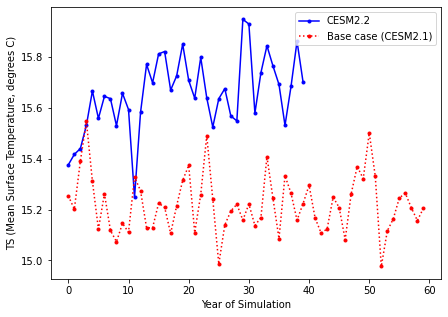

In [21]:
#plt.plot(v2_annual-273.15,'.-k',label='CESM2.2, CESM2.1 finidat')
plt.figure(figsize=(7,5))
plt.plot(v1_annual-273.15,'.-b',label='CESM2.2')
#plt.plot(v5_annual-273.15,'.-g',label='CESM2.2, CESM2.1 restart')
plt.plot((mother_case.TS*weight_factor2)[(400*12+12*0):(400*12+12*60),:,:].mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15,'.:r',
         label='Base case (CESM2.1)')
plt.ylabel('TS (Mean Surface Temperature, degrees C)')
plt.xlabel('Year of Simulation')
plt.legend()

In [74]:
v5=xr.open_mfdataset('/glade/scratch/czarakas/COUP0000_1850spinup_v05/run/'+
                     'COUP0000_1850spinup_v05.cam.h1.*.nc')
v5['time']=v5.time.values-datetime.timedelta(days=15)

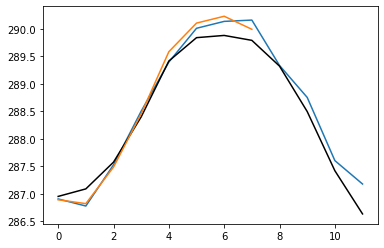

In [79]:
plt.plot(v2_global[0:12])
plt.plot(mother_case_global[0:12],'-k')
plt.plot((v5.TS*weight_factor).mean(dim=['lat','lon']).load())

(0.0, 48.0)

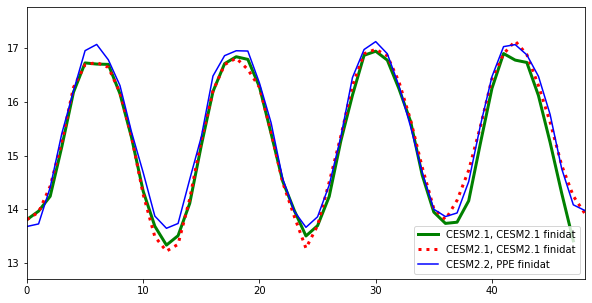

In [81]:
plt.figure(figsize=(10,5))
#plt.plot(v2_global-273.15,'-k',label='CESM2.2, CESM2.1 finidat')
plt.plot(v6_global-273.15,'-g',label='CESM2.1, CESM2.1 finidat', linewidth=3)
plt.plot(mother_case_global-273.15,':r',label='CESM2.1, CESM2.1 finidat', linewidth=3)
plt.plot(v1_global-273.15,'-b',label='CESM2.2, PPE finidat')
plt.legend()
plt.xlim([0,48])

In [14]:
base_pattern = (mother_case.TREFHT*weight_factor2)[(400*12+12*0):(400*12+12*40),:,:].mean(dim='time')
v1_pattern=(v1.TREFHT*weight_factor).mean(dim='time')
diff = v1_pattern-base_pattern

In [2]:
ds1=xr.open_dataset('/glade/p/cesmdata/cseg/inputdata/ocn/pop/gx1v6/forcing/fesedfluxTot_gx1v6_cesm2_2018_c180618.nc')
ds2=xr.open_dataset('/glade/p/cesmdata/cseg/inputdata/ocn/pop/gx1v6/forcing/fesedflux_total_reduce_oxic_POP_gx1v7.c200618.nc')


In [13]:
diff=ds1.FESEDFLUXIN.values-ds2.FESEDFLUXIN.values

In [20]:
ds1

<xarray.Dataset>
Dimensions:      (z: 60, y: 384, x: 320)
Dimensions without coordinates: z, y, x
Data variables:
    FESEDFLUXIN  (z, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [17]:
import numpy as np

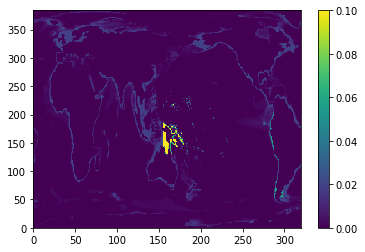

In [25]:
plt.pcolormesh(np.mean(ds1.FESEDFLUXIN.values, axis=0), vmin=0, vmax=0.10)
plt.colorbar()

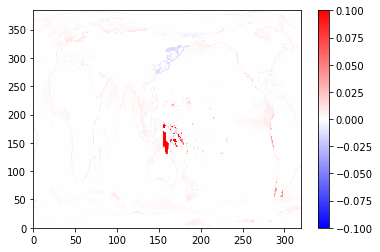

In [22]:
plt.pcolormesh(np.mean(diff, axis=0), cmap=plt.cm.bwr, vmax=0.10, vmin=-0.10)
plt.colorbar()

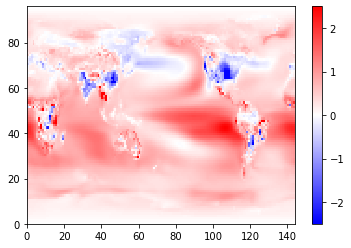

In [26]:
plt.pcolormesh(diff, cmap=plt.cm.bwr, vmin=-2.5, vmax=2.5)
plt.colorbar()

In [ ]:
plt.plot(v2_annual-273.15,'.-k',label='CESM2.2, CESM2.1 finidat')
plt.plot(coup0007_annual-273.15,'.-g',label='CESM2.2, PPE finidat')
plt.plot(coup0008_annual-273.15,'.-',label='CESM2.2, PPE finidat')
plt.plot(v1_annual-273.15,'.-b',label='CESM2.2, PPE finidat')
plt.plot((mother_case.TREFHT*weight_factor2)[(400*12+12*0):(400*12+12*20),:,:].mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15,'.:r',
         label='Base case (CESM2.1)')
plt.legend()

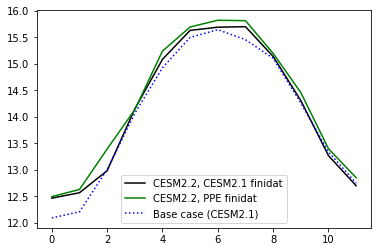

In [9]:
plt.plot((v2.TREFHT*weight_factor).mean(dim=['lat','lon'])-273.15,'-k',label='CESM2.2, CESM2.1 finidat')
plt.plot((v1.TREFHT*weight_factor).mean(dim=['lat','lon'])-273.15,'-g',label='CESM2.2, PPE finidat')
plt.plot((mother_case.TREFHT*weight_factor2)[(400*12+12*1):(400*12+12*2),:,:].mean(dim=['lat','lon'])-273.15,':b',
         label='Base case (CESM2.1)')
plt.legend()

In [ ]:
(mother_case.TREFHT*weight_factor2)[(400*12+12*0):(400*12+12*4),:,:].mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')

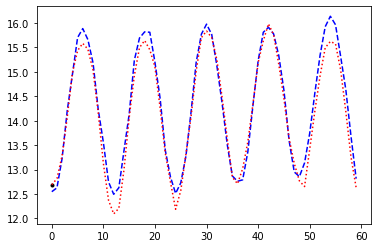

In [45]:
plt.plot((v2.TREFHT*weight_factor).mean(dim=['lat','lon'])-273.15,'.-k',label='CESM2.2, CESM2.1 finidat')
plt.plot((v1.TREFHT*weight_factor).mean(dim=['lat','lon'])[0:5*12]-273.15,'--b',label='CESM2.2, PPE finidat')
plt.plot((mother_case.TREFHT*weight_factor2)[(400*12+12*0):(400*12+12*5),:,:].mean(dim=['lat','lon'])-273.15,':r',
         label='Base case (CESM2.1)')
#plt.legend()